In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [ ]:
#x=df.iloc[:,2:]  to drop 2 columns
#x

In [ ]:
x=df.iloc[:,:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
#Number of clusters
from sklearn.cluster import KMeans
wcss=[] # empty list which appends the values of k
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss


[308812.7800000001,
 221087.1962719298,
 158744.97108013942,
 104366.151455562,
 97211.84353980474,
 68275.94428646985,
 51448.36126259325,
 44640.028048530425,
 42081.855308685335,
 38378.73890793209]

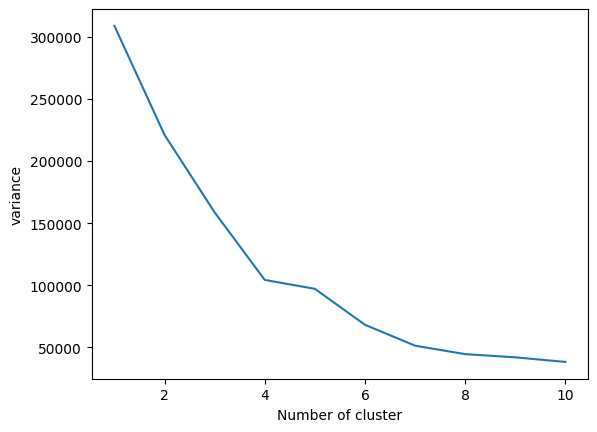

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('Number of cluster')
plt.ylabel('variance')
plt.show()

In [ ]:
# From the graph we select elbow point tend to 7 , so no of cluster 7 or 8

In [ ]:
kmeans=KMeans(n_clusters=7,init='k-means++',random_state=42)
kmeans.fit(x)
y_pred=kmeans.predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
x['cluster']=y_pred
x

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [ ]:
z=x.iloc[:,:-1].values
y=x.iloc[:,-1].values
y

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
z_train,z_test,y_train,y_test=train_test_split(z,y,test_size=0.30,random_state=0)
z_train

array([[ 39,  71,  75],
       [ 47,  60,  47],
       [ 32,  97,  86],
       [ 35,  23,  98],
       [ 38,  78,  76],
       [ 48,  60,  49],
       [ 50,  43,  45],
       [ 31,  81,  93],
       [ 33,  42,  60],
       [ 55,  57,  58],
       [ 35,  74,  72],
       [ 68,  59,  55],
       [ 32,  73,  73],
       [ 49,  62,  48],
       [ 25,  77,  12],
       [ 50,  58,  46],
       [ 66,  63,  48],
       [ 37,  20,  13],
       [ 35,  28,  61],
       [ 32,  75,  93],
       [ 28, 101,  68],
       [ 50,  40,  55],
       [ 19,  74,  10],
       [ 35, 120,  79],
       [ 68,  63,  43],
       [ 67,  47,  52],
       [ 20,  16,   6],
       [ 53,  46,  46],
       [ 44,  73,   7],
       [ 32, 126,  74],
       [ 31,  39,  61],
       [ 67,  19,  14],
       [ 47, 120,  16],
       [ 60,  50,  56],
       [ 45, 126,  28],
       [ 59,  93,  14],
       [ 30,  88,  86],
       [ 43,  71,  35],
       [ 40,  60,  40],
       [ 38,  64,  42],
       [ 34,  78,   1],
       [ 32, 103

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(z_train)
z_train=scaler.transform(z_train)
z_test=scaler.transform(z_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)#k=7
model.fit(z_train,y_train)
y_pred=model.predict(z_test)
y_pred

array([5, 3, 0, 0, 4, 3, 2, 0, 5, 3, 6, 4, 3, 3, 0, 2, 2, 3, 2, 0, 4, 4,
       2, 4, 0, 4, 4, 4, 6, 5, 5, 0, 3, 6, 5, 4, 4, 5, 0, 0, 3, 0, 5, 6,
       3, 0, 5, 6, 0, 4, 0, 6, 3, 6, 4, 5, 5, 3, 0, 0], dtype=int32)

In [ ]:
y_test

array([5, 3, 0, 0, 4, 3, 2, 3, 5, 3, 6, 4, 3, 3, 0, 2, 2, 3, 2, 0, 4, 4,
       2, 4, 0, 4, 4, 4, 6, 5, 5, 0, 3, 6, 5, 1, 4, 5, 0, 0, 3, 0, 5, 6,
       3, 0, 5, 6, 0, 4, 0, 6, 3, 6, 4, 5, 5, 3, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 1,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  7]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9666666666666667

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         5
           3       1.00      0.92      0.96        12
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7

    accuracy                           0.97        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.95      0.97      0.96        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
